# Logistic regression
>  In this chapter you will delve into the details of logistic regression. You'll learn all about regularization and how to interpret model output.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Linear Classifiers in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

## Logistic regression and regularization

## Regularized logistic regression


<div class=""><p>In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization. </p>
<p>The handwritten digits dataset is already loaded, split, and stored in the variables <code>X_train</code>, <code>y_train</code>, <code>X_valid</code>, and <code>y_valid</code>. The variables <code>train_errs</code> and <code>valid_errs</code> are already initialized as empty lists.</p></div>

In [2]:
#@title ⠀ { display-mode: "form" }
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [15]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target, random_state=1)

Instructions
<ul>
<li>Loop over the different values of <code>C_value</code>, creating and fitting a <code>LogisticRegression</code> model each time. </li>
<li>Save the error on the training set and the validation set for each model.</li>
<li>Create a plot of the training and testing error as a function of the regularization parameter, <code>C</code>.</li>
<li>Looking at the plot, what's the best value of <code>C</code>?</li>
</ul>

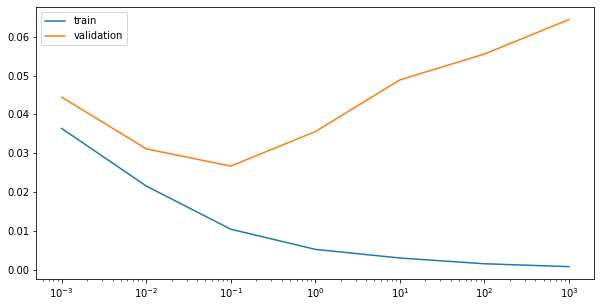

In [17]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, solver='liblinear') #, max_iter=10000
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

**As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.**

### Logistic regression and feature selection

<div class=""><p>In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in <code>X_train</code> and <code>y_train</code>.</p>
<p>We'll search for the best value of <code>C</code> using scikit-learn's <code>GridSearchCV()</code>, which was covered in the prerequisite course.</p></div>

In [38]:
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_train_5000x2500.npz

--2021-01-29 21:52:32--  https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_train_5000x2500.npz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_train_5000x2500.npz [following]
--2021-01-29 21:52:32--  https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/X_train_5000x2500.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962218 (940K) 

In [54]:
from scipy import sparse
from sklearn.model_selection import GridSearchCV
X_train = sparse.load_npz('/content/X_train_5000x2500.npz')

y_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/y_5000x2500.csv')
y_train = y_df['y_train'].values

Instructions
<ul>
<li>Instantiate a logistic regression object that uses L1 regularization.</li>
<li>Find the value of <code>C</code> that minimizes cross-validation error.</li>
<li>Print out the number of selected features for this value of <code>C</code>.</li>
</ul>

In [55]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 2500
Number of selected features: 1220


**As you can see, a whole lot of features were discarded here.**

### Identifying the most positive and negative words


<div class=""><p>In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable <code>lr</code>.</p>
<p>In addition, the words corresponding to the different features are loaded into the variable <code>vocab</code>. For example, since <code>vocab[100]</code> is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.</p></div>

In [66]:
vocab = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/vocab.csv').to_numpy()

Instructions
<ul>
<li>Find the words corresponding to the 5 largest coefficients.</li>
<li>Find the words corresponding to the 5 smallest coefficients.</li>
</ul>

In [71]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: ['prince'], ['knowing'], ['superb'], ['rare'], ['continues'], 

Most negative words: ['disappointing'], ['lame'], ['waste'], ['disappointment'], ['lacks'], 



### Logistic regression and probabilities


### Getting class probabilities

<div class=""><p>Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choice_proba_transform.png" alt=""></p></div>

<pre>
Possible Answers

(1)

(2)

<b>(3)</b>

(4)
</pre>

**The function in the picture is fairly similar to the logistic function used by logistic regression.**

### Regularization and probabilities

<div class=""><p>In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.</p>
<p>A 2D binary classification dataset is already loaded into the environment as <code>X</code> and <code>y</code>.</p></div>

In [73]:
#@title ⠀ { display-mode: "form" }
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

Instructions 1/2
<ul>
<li>Compute the maximum predicted probability.</li>
<li>Run the provided code and take a look at the plot.</li>
</ul>

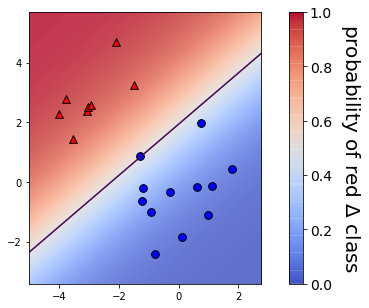

Maximum predicted probability 0.9761229967078282


In [78]:
# Set the regularization strength
model = LogisticRegression(C=1, solver='liblinear')

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Instructions 2/2
<li>Create a model with <code>C=0.1</code> and examine how the plot and probabilities change.</li>

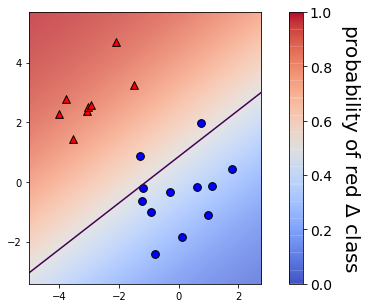

Maximum predicted probability 0.8990965658995651


In [76]:
# Set the regularization strength
model = LogisticRegression(C=0.1, solver='liblinear')

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

**As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!**

### Visualizing easy and difficult examples

<div class=""><p>In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.</p>
<p>The handwritten digits dataset is already loaded into the variables <code>X</code> and <code>y</code>. The <code>show_digit</code> function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.</p></div>

In [82]:
X, y = digits.data, digits.target

def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

Instructions
<ul>
<li>Fill in the first blank with the <em>index</em> of the digit that the model is most confident about.</li>
<li>Fill in the second blank with the <em>index</em> of the digit that the model is least confident about.</li>
<li>Observe the images: do you agree that the first one is less ambiguous than the second?</li>
</ul>

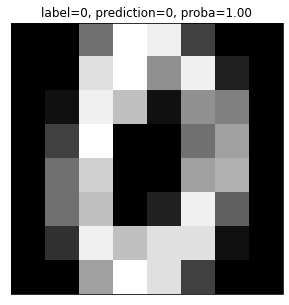

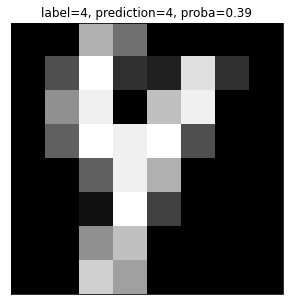

In [84]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

**As you can see, the least confident example looks like a weird 4, and the most confident example looks like a very typical 0.**

### Multi-class logistic regression


### Counting the coefficients


<p>If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?</p>

<pre>
Possible Answers

101

103

301

<b>303</b>

</pre>

### Fitting multi-class logistic regression


<p>In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code>.</p>

In [114]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Instructions
<ul>
<li>Fit a one-vs-rest logistic regression classifier and report the results.</li>
<li>Fit a multinomial logistic regression classifier by setting the <code>multi_class</code> parameter, plus setting to be <code>solver = "lbfgs"</code>, and report the results.</li>
</ul>

In [115]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(solver='liblinear', max_iter=5000)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000)
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9970304380103935
OVR test accuracy    : 0.9711111111111111
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9777777777777777


**As you can see, the accuracies of the two methods are fairly similar on this data set.**

### Visualizing multi-class logistic regression

<div class=""><p>In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme. </p>
<p>The data set is loaded into <code>X_train</code> and <code>y_train</code>. The two logistic regression objects,<code>lr_mn</code> and <code>lr_ovr</code>, are already instantiated (with <code>C=100</code>), fit, and plotted. </p>
<p>Notice that <code>lr_ovr</code> never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.</p></div>

In [121]:
toy_train = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/toy_train_df.csv')
X_train = toy_train.iloc[:, :-1].values
y_train = toy_train.iloc[:, -1].values

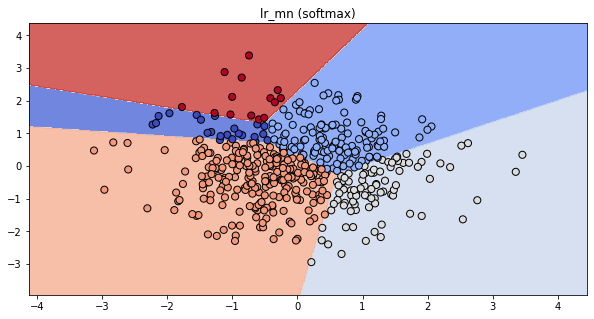

In [151]:
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=100)
lr_mn.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.set_title("lr_mn (softmax)")
plot_classifier(X_train, y_train, lr_mn, ax=ax)

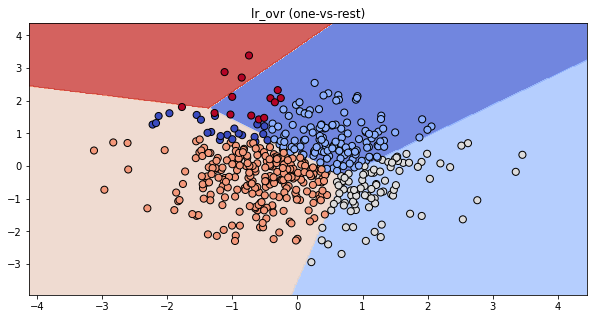

In [149]:
lr_ovr = LogisticRegression(solver='liblinear', C=100)
lr_ovr.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.set_title("lr_ovr (one-vs-rest)")
plot_classifier(X_train, y_train, lr_ovr, ax=ax)

Instructions
<ul>
<li>Create a new logistic regression object (also with <code>C=100</code>) to be used for binary classification.</li>
<li>Visualize this binary classifier with <code>plot_classifier</code>... does it look reasonable?</li>
</ul>

Softmax     training accuracy: 0.996
One-vs-rest training accuracy: 0.916


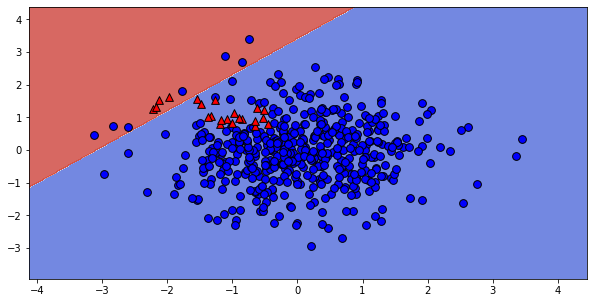

In [152]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

**As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.**

### One-vs-rest SVM


<div class=""><p>As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code> .</p>
<p>Instead of using <code>LinearSVC</code>, we'll now use scikit-learn's <code>SVC</code> object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.</p></div>

![](https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/figures/SVM.svg)

In [157]:
toy_test = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/toy_test_df.csv')
X_test = toy_test.iloc[:, :-1].values
y_test = toy_test.iloc[:, -1].values

Instructions
<ul>
<li>Fit an <code>SVC</code> called <code>svm_class_1</code> to predict class 1 vs. other classes. </li>
<li>Plot this classifier.</li>
</ul>

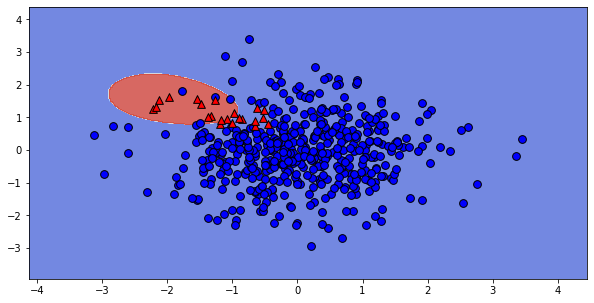

In [160]:
# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

**The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.**